# ***Historical style generator***

This notebook shows the process and orientation in building an Historical style generator.

This notebook was created for a bachelor's degree final project.

Students – ***Leor Ariel Rose***, ***Yahav Bar David***

Academic advisor - ***Dr. Irina Rabaev***

## ***Import Libraries***
Lets import all necessary libraries for this notebook:

In [ ]:
import os
import shutil
import numpy as np
import zipfile
import requests
import io
import cv2
import tensorflow as tf
from typing import Union, List, Dict, Tuple
from tensorflow import keras
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from google.colab import drive

## ***Downloading Data***
Before we begin we need to download our data. We will use the partial data set included in our github repository [***HStyle***](https://github.com/leorrose/HStyle).

The images are divided into categories:
- Historical Hebrew middle ages documents
- Historical Arab
- Historical Latin
- Modern Arab
- Modern English
- Modern Hebrew

Lets define a method to download zip from url:

In [ ]:
def download_zip(url: str, extract_path:str = None) -> None:
  """
  Method to download a zip from url and extract to given directory.

  Args:
    url (str): the zip url
    extract_path (str): the path to extract if none will extract in the 
    running directory. defaults to None
  """
  # get zip
  response: requests.Response = requests.get(url)
  # test status code is 200
  response.raise_for_status()
  # read response content (zip) into zipfile object
  zip: zipfile.ZipFile = zipfile.ZipFile(io.BytesIO(response.content))
  # extract zip to given path
  zip.extractall(extract_path)

Next, lets define a method to download our partial data set:

In [ ]:
def download_partial_data() -> None:
  """
  Method to download partial data set from our github repository
  """
  # define the base folder from which we are working
  base_folder: str = '/content'

  # delete old folder
  if os.path.exists(f'{base_folder}/partial_data_set'):
    shutil.rmtree(f'{base_folder}/partial_data_set')

  # github repository base url
  base_url: str = "https://github.com/leorrose/FinalProject/blob/master"
  # partial image data set url
  images: str = f"{base_url}/partial_data_set.zip?raw=true"
  # download zip
  download_zip(images, base_folder)

Last, lets download our dataset:

In [ ]:
download_partial_data()

## ***Data Exploration***

In our partial data set we have various images. Lets explore them.

First, lets define our base folder path:

In [ ]:
images_base_folder:str = '/content/partial_data_set'

Next, lets define some util methods.

First, a method to open images as tensors:

In [ ]:
def load_img(path_to_img: str) -> tf.Tensor:
  """
  Function to load an image and limit its maximum dimension to 512 pixels
  
  Args:
    path_to_img (str): image path
    
  Returns:
    tf.Tensor: a tensor that represents an image
  """
  # set max dimensions
  max_dim: int = 512
  # read document
  img: tf.Tensor = tf.io.read_file(path_to_img)
  # decode to image
  img: tf.Tensor = tf.image.decode_image(img, channels=3)
  # convert to float, each val between [0,1]
  img: tf.Tensor = tf.image.convert_image_dtype(img, tf.float32)

  # get image width and height
  shape: tf.Tensor = tf.cast(tf.shape(img)[:-1], tf.float32)
  # get max height or width
  long_dim: tf.Tensor= max(shape)
  # get the ratio scale to 512
  scale: tf.Tensor = max_dim / long_dim

  # get the nex image shape by scale ratio
  new_shape: tf.Tensor = tf.cast(shape * scale, tf.int32)

  # resize image
  img: tf.Tensor = tf.image.resize(img, new_shape)
  
  # expand dimension to image array
  img: tf.Tensor = img[tf.newaxis, :]
  return img

Next, a method to convert tensor to image:

In [ ]:
def tensor_to_image(tensor: tf.Tensor) -> Image:
  """
  function to transform tensor to an image
  
  Args:
    tensor (tf.Tensor): tensor representing image

  Returns:
    PIL.Image: pillow image object
  """ 
  # multiply by 255 to undo normalization
  tensor = tensor*255
  # turn to array
  tensor: np.ndarray = np.array(tensor, dtype=np.uint8)
  # remove the array dimension, leave only image
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor: tf.Tensor = tensor[0]
  # return array from image
  return Image.fromarray(tensor)

And at last, a method to plot images:

In [ ]:
def show_images(images: List[np.ndarray], columns:int, rows:int, 
                titles: List[str]=None, figsize:Tuple[int,int]=(10,10), 
                axis=False) -> None:
  """
  Method to show image list in plot

  Args:
    images (List[np.ndarray]): list of images
    columns (int): number of columns. columns * rows = len(images)
    rows (int): number of rows. columns * rows = len(images)
    titles (List[str]): list of images titles. defaults to None
    figsize (Tuple[int,int]): the figure size. defaults to (10, 10)
    axis(boolean): display axis state. defaults to False
  """
  len_images = len(images)

  # create list of empty titles
  if titles is None:
    titles: List[str] = [''] * (columns * rows)
  
  # create image plots
  fig: Figure = plt.figure(figsize=figsize)
  for i in range(1, len_images + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
    plt.title(titles[i-1])
    if not axis:
      plt.axis('off')
  plt.show()

### ***Historical Hebrew middle ages documents***

In our partial data set we have Hebrew middle ages images with text and without text, lets take a look at them:

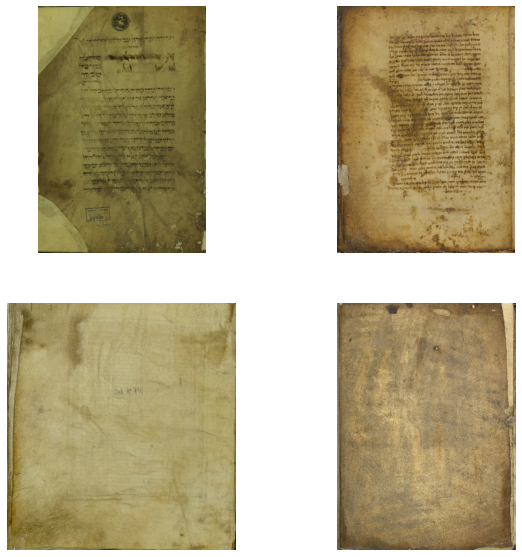

In [ ]:
middle_ages_folder: str = f'{images_base_folder}/hebrew_middle_ages'
show_images([
             tensor_to_image(load_img(f'{middle_ages_folder}/1.png')),
             tensor_to_image(load_img(f'{middle_ages_folder}/2.png')),
             tensor_to_image(load_img(f'{middle_ages_folder}/3.png')),
             tensor_to_image(load_img(f'{middle_ages_folder}/4.png'))
             ], columns=2, rows=2)

### ***Historical Arab***

In our partial data set we have historical Arab images with text, lets take a look at them:

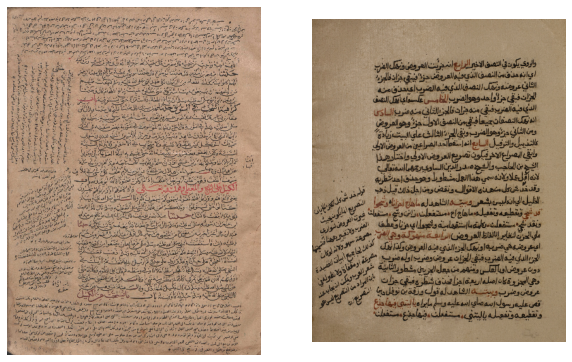

In [ ]:
historical_arab_folder: str = f'{images_base_folder}/historical_arab'
show_images([
             tensor_to_image(load_img(f'{historical_arab_folder}/1.png')),
             tensor_to_image(load_img(f'{historical_arab_folder}/2.png'))
             ], columns=2, rows=1)

### ***Historical Latin***

In our partial data set we have historical Latin images with text, lets take a look at them:

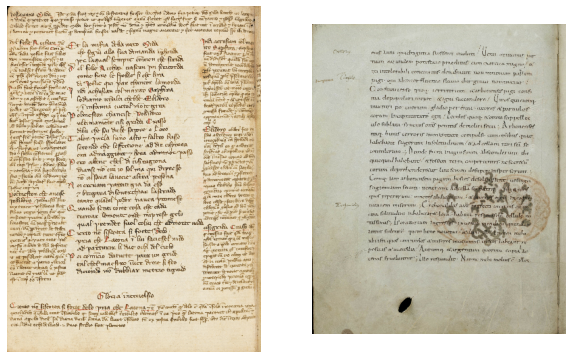

In [ ]:
historical_latin_folder: str = f'{images_base_folder}/latin'
show_images([
             tensor_to_image(load_img(f'{historical_latin_folder}/1.png')),
             tensor_to_image(load_img(f'{historical_latin_folder}/2.png'))
             ], columns=2, rows=1)

### ***Modern Arab***

In our partial data set we have modern Arab images with text, lets take a look at them:

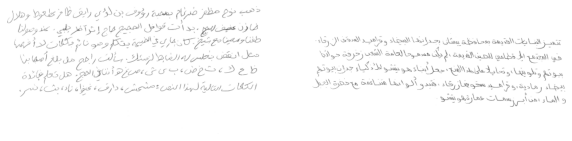

In [ ]:
modern_arab_folder: str = f'{images_base_folder}/modern_arab'
show_images([
             tensor_to_image(load_img(f'{modern_arab_folder}/1.png')),
             tensor_to_image(load_img(f'{modern_arab_folder}/2.png'))
             ], columns=2, rows=1)

### ***Modern English***

In our partial data set we have modern English images with text, lets take a look at them:

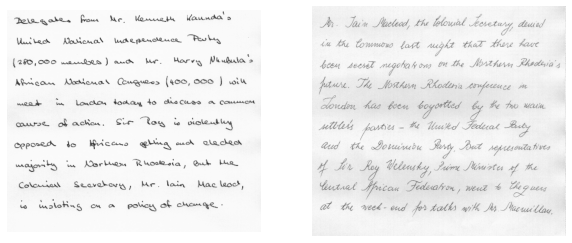

In [ ]:
modern_english_folder: str = f'{images_base_folder}/modern_english'
show_images([
             tensor_to_image(load_img(f'{modern_english_folder}/1.png')),
             tensor_to_image(load_img(f'{modern_english_folder}/2.png'))
             ], columns=2, rows=1)

### ***Modern Hebrew***

In our partial data set we have modern Hebrew images with text, lets take a look at them:

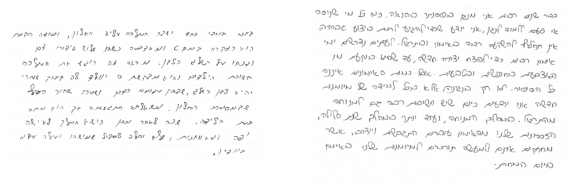

In [ ]:
modern_hebrew_folder: str = f'{images_base_folder}/modern_hebrew'
show_images([
             tensor_to_image(load_img(f'{modern_hebrew_folder}/1.png')),
             tensor_to_image(load_img(f'{modern_hebrew_folder}/2.png'))
             ], columns=2, rows=1)

## ***Build neural style transfer model***

Lets build the Neural style transfer model. This is based on the [A Neural Algorithm of Artistic Style (Gatys et al.)](https://arxiv.org/abs/1508.06576) paper and the [TensorFlow core notebook](https://www.tensorflow.org/tutorials/generative/style_transfer). For more explanation, its best to look at the TensorFlow core notebook which has a lot more explanations and examples. 

#### ***VGG19 intermidate layer extractor***
First, lets create a method to extract intermidate layer values in vgg19 model using the Keras functional API:

In [ ]:
def vgg_layers(layer_names: List[str]) -> tf.keras.Model:
  """ 
  Method to Creates a vgg model that returns a list of intermediate output 
  values.
  
  Args:
    layer_names (list[str]): intermediate layer names for output
    
  Returns:
     tf.keras.Model: a vgg model that returns a list of intermediate 
     output values
  """
  # Load pretrained VGG, trained on imagenet data
  vgg: tf.keras.Model = tf.keras.applications.VGG19(include_top=False, 
                                                    weights='imagenet')
  # set layers to not be trained
  vgg.trainable = False
  
  # get the outputs of each intermediate layer
  outputs = [vgg.get_layer(name).output for name in layer_names]

  # return functional API
  return  tf.keras.Model([vgg.input], outputs)

Example of the intermidate layers extractor:

In [ ]:
# define layers to extract
layers: List[str] = ['block1_conv1', 'block2_conv1',
                     'block3_conv1', 'block4_conv1', 
                     'block5_conv1']

# get functional model of layers outputs
extractor: tf.keras.Model = vgg_layers(layers)

# open image
img: tf.Tensor = load_img('/content/partial_data_set/modern_hebrew/1.png')

# forward pass image to get intermidate outputs
outputs: List[tf.Tensor] = extractor(img*255)

#Look at the statistics of each layer's output
for name, output in zip(layers, outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 282, 512, 64)
  min:  0.0
  max:  875.8389
  mean:  38.673378

block2_conv1
  shape:  (1, 141, 256, 128)
  min:  0.0
  max:  4500.702
  mean:  234.08632

block3_conv1
  shape:  (1, 70, 128, 256)
  min:  0.0
  max:  10819.923
  mean:  239.6346

block4_conv1
  shape:  (1, 35, 64, 512)
  min:  0.0
  max:  22405.125
  mean:  865.0689

block5_conv1
  shape:  (1, 17, 32, 512)
  min:  0.0
  max:  1760.7178
  mean:  39.18996



#### ***Style Calulation***
Next, lets create a method to calculate style of image (Gram matrix):

In [ ]:
def gram_matrix(input_tensor: tf.Tensor) -> tf.Tensor:
  """
  Function to calculate gram matrix of an image (feature-wise outer product)
  
  Args:
    input_tensor (tf.Tensor): the image
  
  Returns:
    tf.Tensor: the gram matrix result
  """
  # calculate the outer product of the feature vector with itself  
  # at each location
  result: tf.Tensor = tf.linalg.einsum('bijc,bijd->bcd', input_tensor,
                                       input_tensor)

  # get tensor shape
  input_shape: tf.Tensor = tf.shape(input_tensor)

  # calculate shape to avarge outer product
  num_locations: tf.Tensor = tf.cast(input_shape[1]*input_shape[2], tf.float32)

  # return averaging outer product over all locations
  return result/(num_locations)

#### ***Style and content extractor***
Next, we will build a model that returns the style and content tensors. When called on an image, this model returns the gram matrix (style) of the style layers and content of the content layers:


In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers: List[str], content_layers: List[str]):
    """
    Initialization Method
    
    Args:
      style_layers (List[str]): the style intermidate layers
      content_layers (List[str]): the content intermidate layers
    """

    super(StyleContentModel, self).__init__()
    self.vgg: tf.keras.Model =  vgg_layers(style_layers + content_layers)
    self.vgg.trainable = False
    self.style_layers: List[str] = style_layers
    self.num_style_layers: int = len(style_layers)
    self.content_layers: List[str] = content_layers

  def call(self, inputs: tf.Tensor) -> Dict[str, tf.Tensor]:
    """
    Method to overide call operation to enable creation of gram matrix 
    and content
    
    Args:
      inputs (tf.Tensor): a tensor that represents content ans style images,
      Expects float input in [0,1]
  
    Returns:
      Dict[str, Union[list, Tensor]]: gram matrix of the style layers and 
      content of the content layers:
    """
    # make image in range [0, 255]
    inputs: tf.Tensor = inputs*255.0

    # vgg19 preprocess function
    preprocessed_input: tf.Tensor = tf.keras.applications.\
                                    vgg19.preprocess_input(inputs)

    # forward pass content and style images
    outputs: list[tf.Tensor] = self.vgg(preprocessed_input)

    # get the outputs of content and style from the forward pass
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    # calculate gram matrix for style outputs
    style_outputs: list[tf.Tensor] = [gram_matrix(style_output)
                                      for style_output in style_outputs]
    
    # create dict where key is layer name and value is output
    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}
    
    # create dict where key is layer name and value is output
    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

Example of the style and content extractor:

In [ ]:
# open image
img: tf.Tensor = load_img('/content/partial_data_set/modern_hebrew/1.png')

# create extractor
extractor: StyleContentModel = StyleContentModel(['block5_conv2', 
                                                  'block4_conv2', 
                                                  'block3_conv4', 
                                                  'block3_conv3',
                                                  'block3_conv2'],
                                                 ['block5_conv2'])

# extract
results: Dict[str, tf.Tensor] = extractor(tf.constant(img))

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())

Styles:
   block3_conv2
    shape:  (1, 256, 256)
    min:  0.0
    max:  1424854.5
    mean:  46184.406

   block3_conv3
    shape:  (1, 256, 256)
    min:  7.6043773
    max:  2300970.8
    mean:  172614.05

   block3_conv4
    shape:  (1, 256, 256)
    min:  0.0
    max:  18727950.0
    mean:  284375.16

   block4_conv2
    shape:  (1, 512, 512)
    min:  0.0
    max:  17453428.0
    mean:  129653.15

   block5_conv2
    shape:  (1, 512, 512)
    min:  0.0
    max:  81771.45
    mean:  132.2256

Contents:
   block5_conv2
    shape:  (1, 17, 32, 512)
    min:  0.0
    max:  538.52136
    mean:  11.294965


#### ***Gradient descent***

Next, lets define and create our gradient decent process.

First, lets define our style content loss:

In [ ]:
def style_content_loss(outputs: Dict[str, tf.Tensor], style_targets: tf.Tensor, 
                       content_targets: tf.Tensor, num_style_layers: int, 
                       num_content_layers: int, style_weight: float, 
                       content_weight: float) -> tf.Tensor:
  """
  Function to calculate style and content loss
    
  Args:
    outputs (Dict[str, tf.Tensor]): the rendered image intermidate outputs
    style_targets (tf.Tensor): the style intermidate outputs
    content_targets (tf.Tensor): the content intermidate outputs
    num_style_layers: number of style layers
    num_content_layers(int): number of content layers
    style_weight (float): the style weight
    content_weight (float): the content weight
  
  Returns:
    tf.Tensor: style and content loss
  """
  # get style intermidate outputs of rendered image
  style_outputs: tf.Tensor = outputs['style']

  # get content intermidate outputs of rendered image
  content_outputs: tf.Tensor = outputs['content']

  # calculate style loss
  style_loss: tf.Tensor = tf.add_n(
      [tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
      for name in style_outputs.keys()])
  style_loss *= style_weight / num_style_layers

  # calculate content loss
  content_loss: tf.Tensor = tf.add_n(
      [tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
      for name in content_outputs.keys()])
  content_loss *= content_weight / num_content_layers
  
  # return style and content loss
  return style_loss + content_loss

Next, lets create a method to keep image values between 0 to 1:

In [ ]:
def clip_0_1(image: tf.Tensor) -> tf.Tensor:
  """
  Method to keep the pixel values between 0 and 1
  
  Args:
      inputs (tf.Tensor): the image
  
  Returns:
       tf.Tensor: a clipped tensor
  """
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

Next, lets create a method to apply train step without considering total variation loss:

In [ ]:
def train_step_without_variation_loss(image: tf.Variable, 
                                   extractor: StyleContentModel, 
                                   opt: tf.optimizers.Adam, 
                                   style_targets: tf.Tensor, 
                                   content_targets: tf.Tensor, 
                                   num_style_layers: int, 
                                   num_content_layers: int, 
                                   style_weight: float, 
                                   content_weight: float) -> None:
  """
  Method to apply a training step with total variation consideration
    
  Args:
    image (tf.Variable): the rendered image
    extractor (StyleContentModel): the intermidate layer extractor
    opt (tf.optimizers.Adam): the optimizer
    style_targets (tf.Tensor): the style intermidate outputs
    content_targets (tf.Tensor): the content intermidate outputs
    num_style_layers: number of style layers
    num_content_layers(int): number of content layers
    style_weight (float): the style weight
    content_weight (float): the content weight
    total_variation_weight (float): the total variation weight
  """
  with tf.GradientTape() as tape:
    # forward pass rendered image
    outputs: Dict[str, tf.Tensor] = extractor(image)

    # calculate style content loss
    loss: tf.Tensor = style_content_loss(outputs, style_targets, 
                                         content_targets, num_style_layers, 
                                         num_content_layers, style_weight, 
                                         content_weight)

  # calculate gradient descent
  grad = tape.gradient(loss, image)

  # apply gradient descent
  opt.apply_gradients([(grad, image)])

  # update image and clip to [0,1]
  image.assign(clip_0_1(image))

Next, lets create a method to calculate total varation:

In [ ]:
def high_pass_x_y(image: tf.Variable) -> Tuple[tf.Tensor, tf.Tensor]:
  """
  Method to calc high frequency components of the image on x axis
  and y axis of image
    
  Args:
    image (tf.Variable): the rendered image
  
  Returns:
    Tuple[tf.Tensor, tf.Tensor]: high frequency components of the image
  """
  x_var: tf.Tensor = image[:,:,1:,:] - image[:,:,:-1,:]
  y_var: tf.Tensor  = image[:,1:,:,:] - image[:,:-1,:,:]
  return x_var, y_var


def total_variation_loss(image: tf.Variable) -> tf.Tensor:
  """
  Method to calc total variation loss
    
  Args:
    image (tf.Variable): the rendered image
  
  Returns:
    tf.Tensor: the total variation
  """
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

At last, lets redefine the train step to take total variation into considaration:

In [ ]:
def train_step_with_variation_loss(image: tf.Variable, 
                                   extractor: StyleContentModel, 
                                   opt: tf.optimizers.Adam, 
                                   style_targets: tf.Tensor, 
                                   content_targets: tf.Tensor, 
                                   num_style_layers: int, 
                                   num_content_layers: int, 
                                   style_weight: float, 
                                   content_weight: float, 
                                   total_variation_weight: float) -> None:
  """
  Method to apply a training step with total variation consideration
    
  Args:
    image (tf.Variable): the rendered image
    extractor (StyleContentModel): the intermidate layer extractor
    opt (tf.optimizers.Adam): the optimizer
    style_targets (tf.Tensor): the style intermidate outputs
    content_targets (tf.Tensor): the content intermidate outputs
    num_style_layers: number of style layers
    num_content_layers(int): number of content layers
    style_weight (float): the style weight
    content_weight (float): the content weight
    total_variation_weight (float): the total variation weight
  """
  with tf.GradientTape() as tape:
    # forward pass rendered image
    outputs: Dict[str, tf.Tensor] = extractor(image)

    # calculate style content loss
    loss: tf.Tensor = style_content_loss(outputs, style_targets, 
                                         content_targets, num_style_layers,
                                         num_content_layers, style_weight,
                                         content_weight)

    # add total variation loss
    loss += total_variation_weight*tf.image.total_variation(image)

  # calculate gradient descent
  grad = tape.gradient(loss, image)

  # apply gradient descent
  opt.apply_gradients([(grad, image)])

  # update image and clip to [0,1]
  image.assign(clip_0_1(image))

#### ***Neural style transfer rendering***

Lets create a method to apply all the above and create a neural style transfer rendering:

In [ ]:
def render_image(content_path: str, style_path: str, content_layers: List[str],
                 style_layers: List[str], style_weight: float, 
                 content_weight: float, total_variation_weight:float, 
                 epochs_without_variation: int, epochs_with_variation: int, 
                 steps_per_epoch: int) -> tf.Tensor:
  """
  Method to render neural style transfer from style and content
    
  Args:
    content_path (str): the content image path
    style_path (str): the style image path
    content_layers (List[str]): the conten intermediate layers
    style_layers (List[str]): the style intermediate layers
    style_weight (float): the style weight
    content_weight (float): the content weight
    total_variation_weight (float): the total variation weight
    epochs_without_variation (int): number of epochs to perform without 
    total variation consideration
    epochs_with_variation(int): number of epochs to perform with 
    total variation consideration
    steps_per_epoch(int): number of steps in each epoch
  
  Returns:
    tf.Tensor: the rendered image
  """
  # calculate number of content and style layers
  num_content_layers: int = len(content_layers)
  num_style_layers: int = len(style_layers)

  # load content and style images
  content_image: tf.Tensor = load_img(content_path)
  style_image: tf.Tensor = load_img(style_path)

  # create extractor
  extractor: StyleContentModel = StyleContentModel(style_layers,
                                                      content_layers)
  # get style content outputs
  style_targets: tf.Tensor = extractor(style_image)['style']
  content_targets: tf.Tensor = extractor(content_image)['content']
  
  # create optimizer for gradient decent
  opt: tf.optimizers.Adam = tf.optimizers.Adam(learning_rate=0.02, 
                                               beta_1=0.99, epsilon=1e-1)
  
  # define a tf.Variable to contain the image to optimize
  image: tf.Variable = tf.Variable(content_image)
  
  # perform optimization without total variation
  step: int = 0
  for n in range(epochs_without_variation):
    for m in range(steps_per_epoch):
      step += 1
      train_step_without_variation_loss(image, extractor, opt, style_targets, 
                                        content_targets, num_style_layers, 
                                        num_content_layers, style_weight, 
                                        content_weight)

  # define a tf.Variable to contain the image to optimize
  image: tf.Variable = tf.Variable(content_image)

  # perform optimization with total variation
  step: int = 0
  for n in range(epochs_with_variation):
    for m in range(steps_per_epoch):
      step += 1
      train_step_with_variation_loss(image, extractor, opt, style_targets, 
                                     content_targets, num_style_layers, 
                                     num_content_layers, style_weight, 
                                     content_weight, total_variation_weight)
  
  return image

#### ***All steps combined***:

In [ ]:
def vgg_layers(layer_names: List[str]) -> tf.keras.Model:
  """ 
  Method to Creates a vgg model that returns a list of intermediate output 
  values.
  
  Args:
    layer_names (list[str]): intermediate layer names for output
    
  Returns:
     tf.keras.Model: a vgg model that returns a list of intermediate 
     output values
  """
  # Load pretrained VGG, trained on imagenet data
  vgg: tf.keras.Model = tf.keras.applications.VGG19(include_top=False, 
                                                    weights='imagenet')
  # set layers to not be trained
  vgg.trainable = False
  
  # get the outputs of each intermediate layer
  outputs = [vgg.get_layer(name).output for name in layer_names]

  # return functional API
  return  tf.keras.Model([vgg.input], outputs)


def gram_matrix(input_tensor: tf.Tensor) -> tf.Tensor:
  """
  Function to calculate gram matrix of an image (feature-wise outer product)
  
  Args:
    input_tensor (tf.Tensor): the image
  
  Returns:
    tf.Tensor: the gram matrix result
  """
  # calculate the outer product of the feature vector with itself  
  # at each location
  result: tf.Tensor = tf.linalg.einsum('bijc,bijd->bcd', input_tensor,
                                       input_tensor)

  # get tensor shape
  input_shape: tf.Tensor = tf.shape(input_tensor)

  # calculate shape to avarge outer product
  num_locations: tf.Tensor = tf.cast(input_shape[1]*input_shape[2], tf.float32)

  # return averaging outer product over all locations
  return result/(num_locations)


class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers: List[str], content_layers: List[str]):
    """
    Initialization Method
    
    Args:
      style_layers (List[str]): the style intermidate layers
      content_layers (List[str]): the content intermidate layers
    """

    super(StyleContentModel, self).__init__()
    self.vgg: tf.keras.Model =  vgg_layers(style_layers + content_layers)
    self.vgg.trainable = False
    self.style_layers: List[str] = style_layers
    self.num_style_layers: int = len(style_layers)
    self.content_layers: List[str] = content_layers

  def call(self, inputs: tf.Tensor) -> Dict[str, tf.Tensor]:
    """
    Method to overide call operation to enable creation of gram matrix 
    and content
    
    Args:
      inputs (tf.Tensor): a tensor that represents content ans style images,
      Expects float input in [0,1]
  
    Returns:
      Dict[str, Union[list, Tensor]]: gram matrix of the style layers and 
      content of the content layers:
    """
    # make image in range [0, 255]
    inputs: tf.Tensor = inputs*255.0

    # vgg19 preprocess function
    preprocessed_input: tf.Tensor = tf.keras.applications.\
                                    vgg19.preprocess_input(inputs)

    # forward pass content and style images
    outputs: list[tf.Tensor] = self.vgg(preprocessed_input)

    # get the outputs of content and style from the forward pass
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    # calculate gram matrix for style outputs
    style_outputs: list[tf.Tensor] = [gram_matrix(style_output)
                                      for style_output in style_outputs]
    
    # create dict where key is layer name and value is output
    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}
    
    # create dict where key is layer name and value is output
    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}


def style_content_loss(outputs: Dict[str, tf.Tensor], style_targets: tf.Tensor, 
                       content_targets: tf.Tensor, num_style_layers: int, 
                       num_content_layers: int, style_weight: float, 
                       content_weight: float) -> tf.Tensor:
  """
  Function to calculate style and content loss
    
  Args:
    outputs (Dict[str, tf.Tensor]): the rendered image intermidate outputs
    style_targets (tf.Tensor): the style intermidate outputs
    content_targets (tf.Tensor): the content intermidate outputs
    num_style_layers: number of style layers
    num_content_layers(int): number of content layers
    style_weight (float): the style weight
    content_weight (float): the content weight
  
  Returns:
    tf.Tensor: style and content loss
  """
  # get style intermidate outputs of rendered image
  style_outputs: tf.Tensor = outputs['style']

  # get content intermidate outputs of rendered image
  content_outputs: tf.Tensor = outputs['content']

  # calculate style loss
  style_loss: tf.Tensor = tf.add_n(
      [tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
      for name in style_outputs.keys()])
  style_loss *= style_weight / num_style_layers

  # calculate content loss
  content_loss: tf.Tensor = tf.add_n(
      [tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
      for name in content_outputs.keys()])
  content_loss *= content_weight / num_content_layers
  
  # return style and content loss
  return style_loss + content_loss


def clip_0_1(image: tf.Tensor) -> tf.Tensor:
  """
  Method to keep the pixel values between 0 and 1
  
  Args:
      inputs (tf.Tensor): the image
  
  Returns:
       tf.Tensor: a clipped tensor
  """
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)


def train_step_without_variation_loss(image: tf.Variable, 
                                   extractor: StyleContentModel, 
                                   opt: tf.optimizers.Adam, 
                                   style_targets: tf.Tensor, 
                                   content_targets: tf.Tensor, 
                                   num_style_layers: int, 
                                   num_content_layers: int, 
                                   style_weight: float, 
                                   content_weight: float) -> None:
  """
  Method to apply a training step with total variation consideration
    
  Args:
    image (tf.Variable): the rendered image
    extractor (StyleContentModel): the intermidate layer extractor
    opt (tf.optimizers.Adam): the optimizer
    style_targets (tf.Tensor): the style intermidate outputs
    content_targets (tf.Tensor): the content intermidate outputs
    num_style_layers: number of style layers
    num_content_layers(int): number of content layers
    style_weight (float): the style weight
    content_weight (float): the content weight
    total_variation_weight (float): the total variation weight
  """
  with tf.GradientTape() as tape:
    # forward pass rendered image
    outputs: Dict[str, tf.Tensor] = extractor(image)

    # calculate style content loss
    loss: tf.Tensor = style_content_loss(outputs, style_targets,
                                         content_targets, num_style_layers,
                                         num_content_layers, style_weight,
                                         content_weight)

  # calculate gradient descent
  grad = tape.gradient(loss, image)

  # apply gradient descent
  opt.apply_gradients([(grad, image)])

  # update image and clip to [0,1]
  image.assign(clip_0_1(image))


def high_pass_x_y(image: tf.Variable) -> Tuple[tf.Tensor, tf.Tensor]:
  """
  Method to calc high frequency components of the image on x axis
  and y axis of image
    
  Args:
    image (tf.Variable): the rendered image
  
  Returns:
    Tuple[tf.Tensor, tf.Tensor]: high frequency components of the image
  """
  x_var: tf.Tensor = image[:,:,1:,:] - image[:,:,:-1,:]
  y_var: tf.Tensor  = image[:,1:,:,:] - image[:,:-1,:,:]
  return x_var, y_var


def total_variation_loss(image: tf.Variable) -> tf.Tensor:
  """
  Method to calc total variation loss
    
  Args:
    image (tf.Variable): the rendered image
  
  Returns:
    tf.Tensor: the total variation
  """
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))


def train_step_with_variation_loss(image: tf.Variable, 
                                   extractor: StyleContentModel, 
                                   opt: tf.optimizers.Adam, 
                                   style_targets: tf.Tensor, 
                                   content_targets: tf.Tensor, 
                                   num_style_layers: int, 
                                   num_content_layers: int, 
                                   style_weight: float, 
                                   content_weight: float, 
                                   total_variation_weight: float) -> None:
  """
  Method to apply a training step with total variation consideration
    
  Args:
    image (tf.Variable): the rendered image
    extractor (StyleContentModel): the intermidate layer extractor
    opt (tf.optimizers.Adam): the optimizer
    style_targets (tf.Tensor): the style intermidate outputs
    content_targets (tf.Tensor): the content intermidate outputs
    num_style_layers: number of style layers
    num_content_layers(int): number of content layers
    style_weight (float): the style weight
    content_weight (float): the content weight
    total_variation_weight (float): the total variation weight
  """
  with tf.GradientTape() as tape:
    # forward pass rendered image
    outputs: Dict[str, tf.Tensor] = extractor(image)

    # calculate style content loss
    loss: tf.Tensor = style_content_loss(outputs, style_targets, 
                                         content_targets, num_style_layers,
                                         num_content_layers, style_weight,
                                         content_weight)

    # add total variation loss
    loss += total_variation_weight*tf.image.total_variation(image)

  # calculate gradient descent
  grad = tape.gradient(loss, image)

  # apply gradient descent
  opt.apply_gradients([(grad, image)])

  # update image and clip to [0,1]
  image.assign(clip_0_1(image))


def render_image(content_path: str, style_path: str, content_layers: List[str],
                 style_layers: List[str], style_weight: float, 
                 content_weight: float, total_variation_weight:float, 
                 epochs_without_variation: int, epochs_with_variation: int, 
                 steps_per_epoch: int) -> tf.Tensor:
  """
  Method to render neural style transfer from style and content
    
  Args:
    content_path (str): the content image path
    style_path (str): the style image path
    content_layers (List[str]): the conten intermediate layers
    style_layers (List[str]): the style intermediate layers
    style_weight (float): the style weight
    content_weight (float): the content weight
    total_variation_weight (float): the total variation weight
    epochs_without_variation (int): number of epochs to perform without 
    total variation consideration
    epochs_with_variation(int): number of epochs to perform with 
    total variation consideration
    steps_per_epoch(int): number of steps in each epoch
  
  Returns:
    tf.Tensor: the rendered image
  """
  # calculate number of content and style layers
  num_content_layers: int = len(content_layers)
  num_style_layers: int = len(style_layers)

  # load content and style images
  content_image: tf.Tensor = load_img(content_path)
  style_image: tf.Tensor = load_img(style_path)

  # create extractor
  extractor: StyleContentModel = StyleContentModel(style_layers,
                                                      content_layers)
  # get style content outputs
  style_targets: tf.Tensor = extractor(style_image)['style']
  content_targets: tf.Tensor = extractor(content_image)['content']
  
  # create optimizer for gradient decent
  opt: tf.optimizers.Adam = tf.optimizers.Adam(learning_rate=0.02, 
                                               beta_1=0.99, epsilon=1e-1)
  
  # define a tf.Variable to contain the image to optimize
  image: tf.Variable = tf.Variable(content_image)
  
  # perform optimization without total variation
  step: int = 0
  for n in range(epochs_without_variation):
    for m in range(steps_per_epoch):
      step += 1
      train_step_without_variation_loss(image, extractor, opt, style_targets, 
                                        content_targets, num_style_layers, 
                                        num_content_layers, style_weight, 
                                        content_weight)

  # define a tf.Variable to contain the image to optimize
  image: tf.Variable = tf.Variable(content_image)

  # perform optimization with total variation
  step: int = 0
  for n in range(epochs_with_variation):
    for m in range(steps_per_epoch):
      step += 1
      train_step_with_variation_loss(image, extractor, opt, style_targets, 
                                     content_targets, num_style_layers, 
                                     num_content_layers, style_weight, 
                                     content_weight, total_variation_weight)
  
  return image


## ***VGG19 Feature extraction***
In order to understand from which layers it is best to extract the features for our content, lets visualize the features extracted from intermidate layers. 

First, lets define intermidate layers to extract output:

In [ ]:
layers: List[str]= ['block1_conv1', 'block1_conv2', 'block2_conv1', 
                     'block2_conv2', 'block3_conv1', 'block3_conv2', 
                     'block3_conv3', 'block3_conv4', 'block4_conv1', 
                     'block4_conv2', 'block4_conv3', 'block4_conv4', 
                     'block5_conv1', 'block5_conv2', 'block5_conv3', 
                     'block5_conv4']

Next, lets extract the intermidate layers output:

In [ ]:
# create intermidate layers output extractor
model: tf.keras.Model = vgg_layers(layers)

# load and preprocess a text image
text_img_path = '/content/partial_data_set/modern_hebrew/1.png'
text_img: tf.Tensor = load_img(text_img_path)
text_img: tf.Tensor = tf.keras.applications.vgg19.preprocess_input(text_img)

# get intermidate layers output
content_feature_maps: List[tf.Tensor] = model(text_img)

Lastly, let's visualize the features extracted from each layer. We only visualize 64 features although some output layers have more, but we just want to get an intuition of which layers to use:

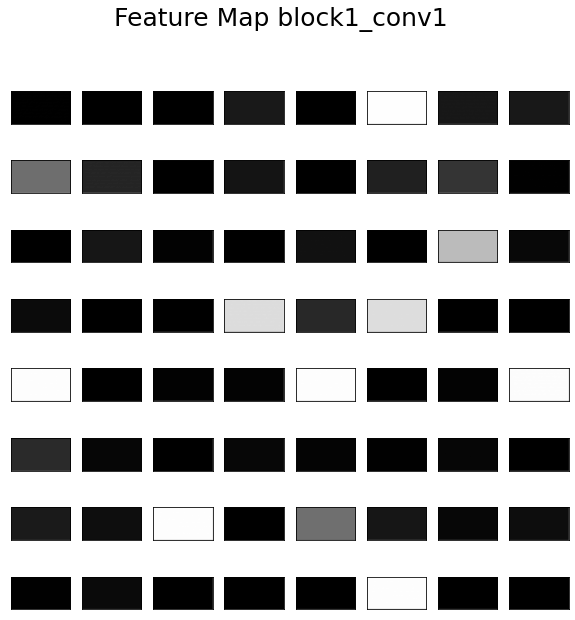

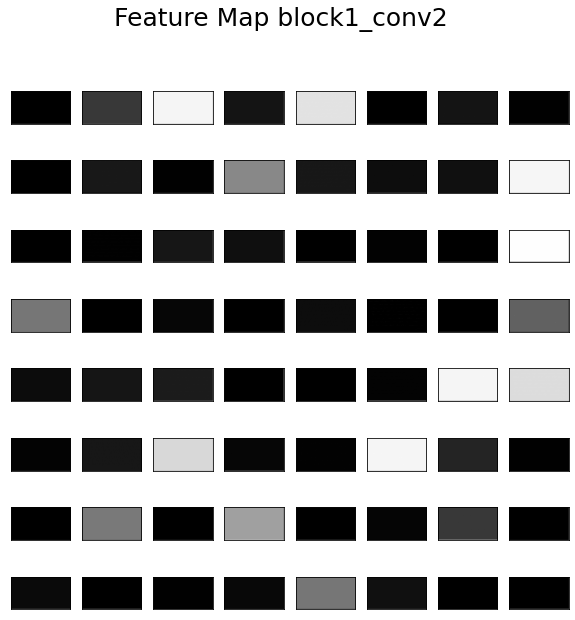

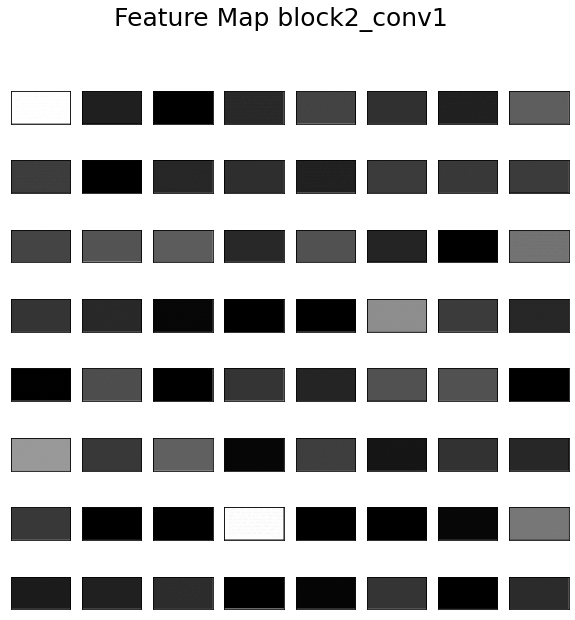

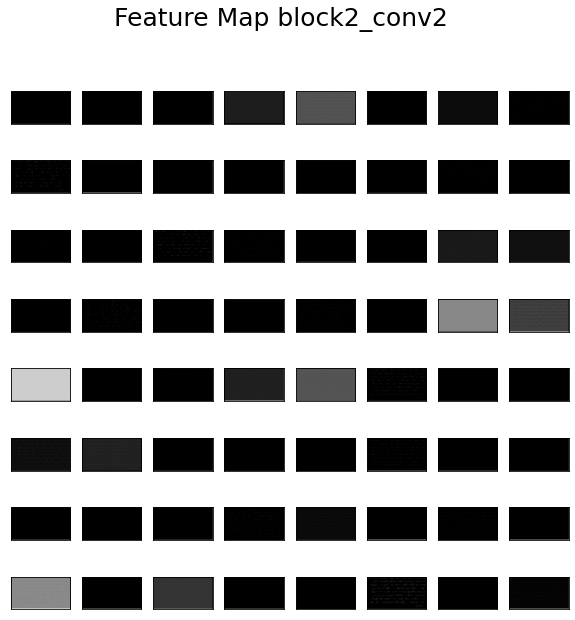

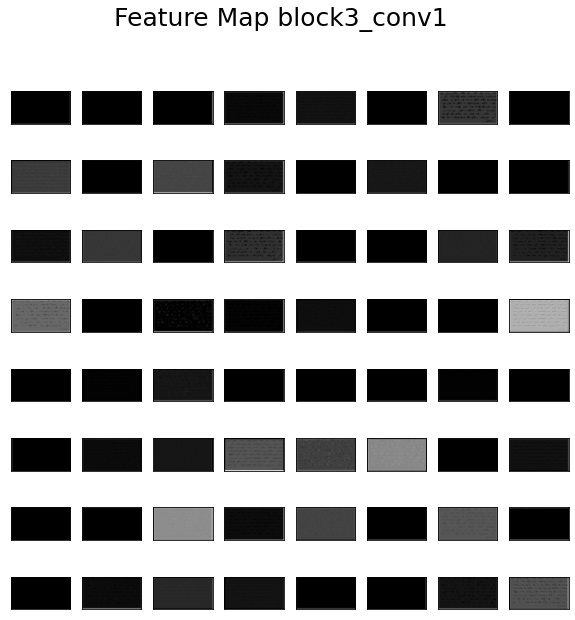

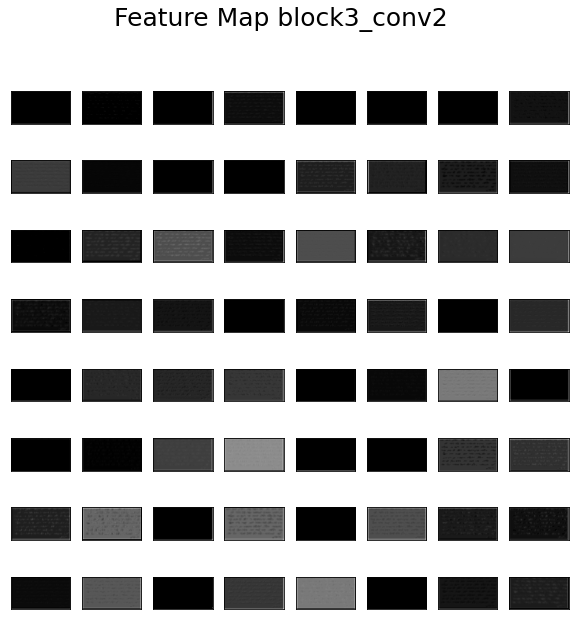

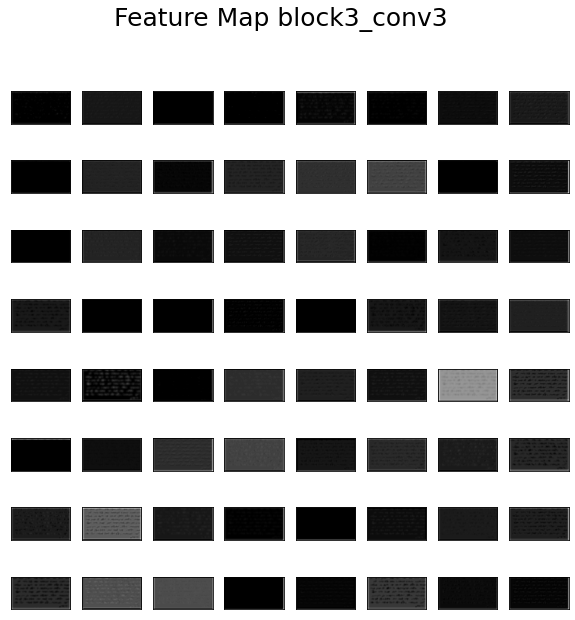

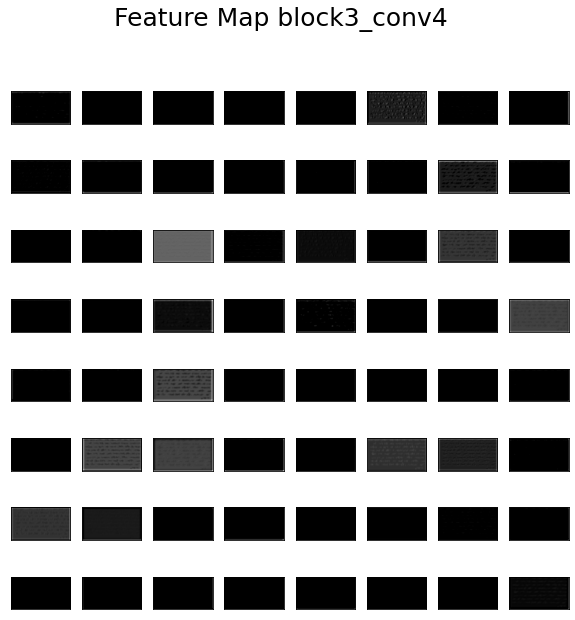

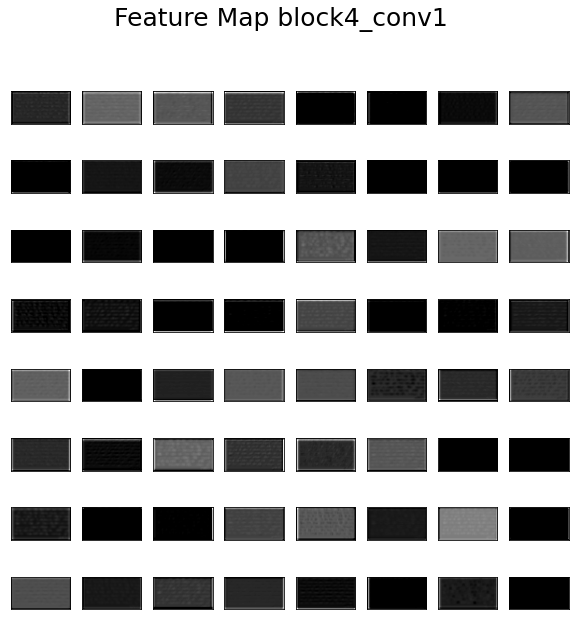

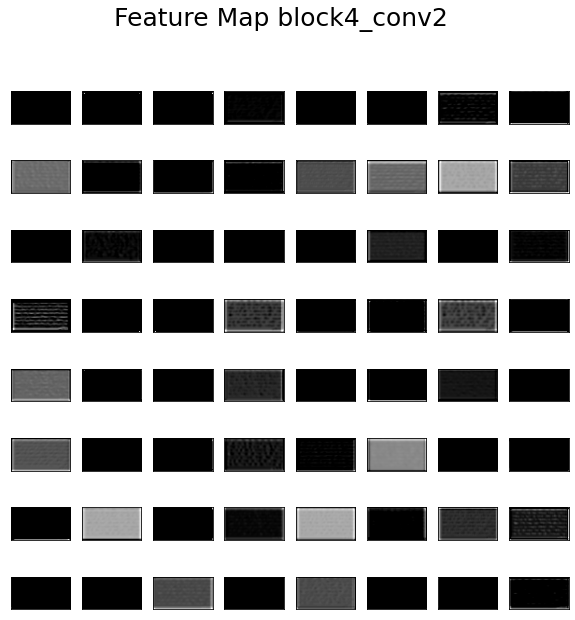

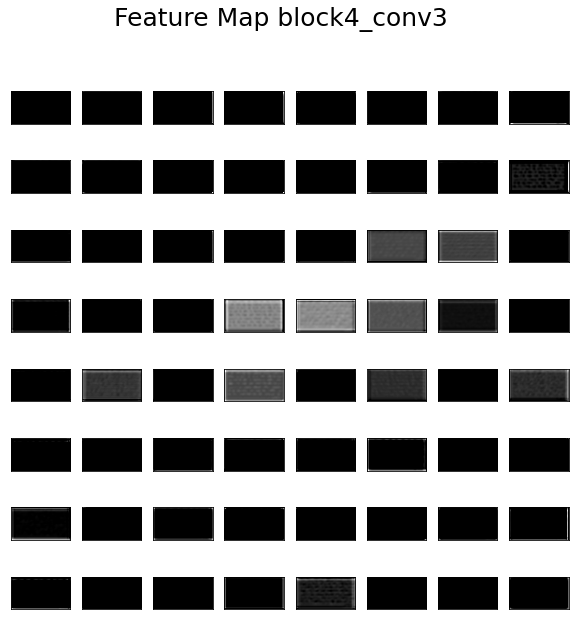

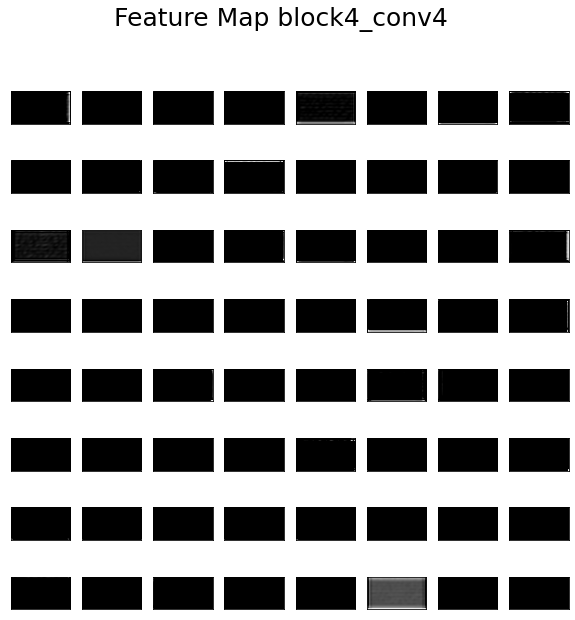

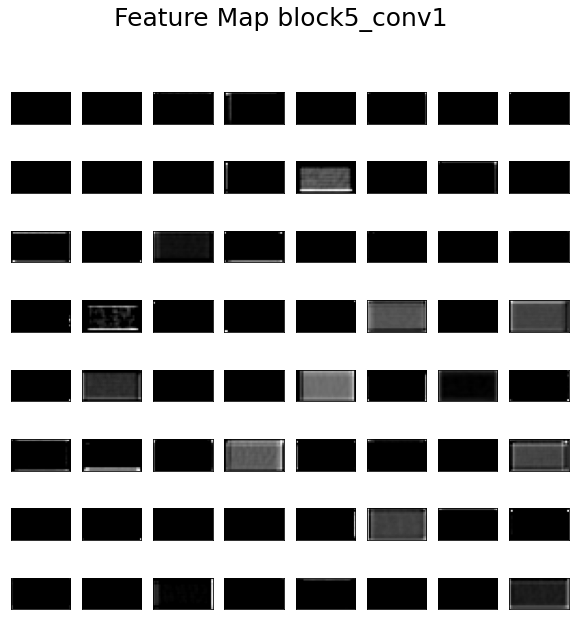

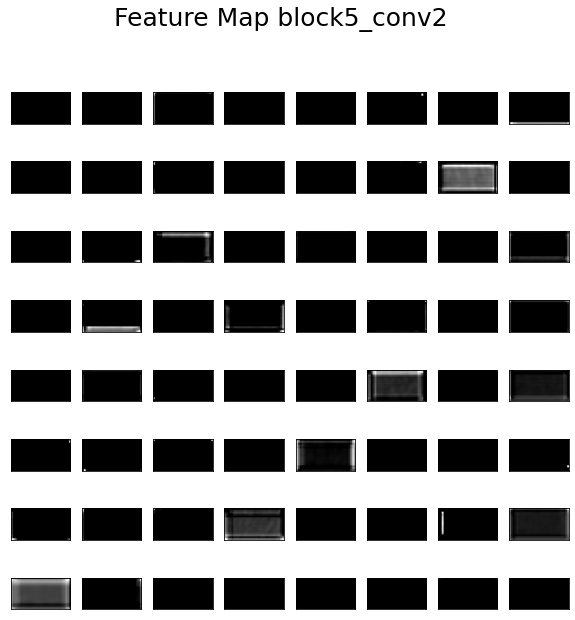

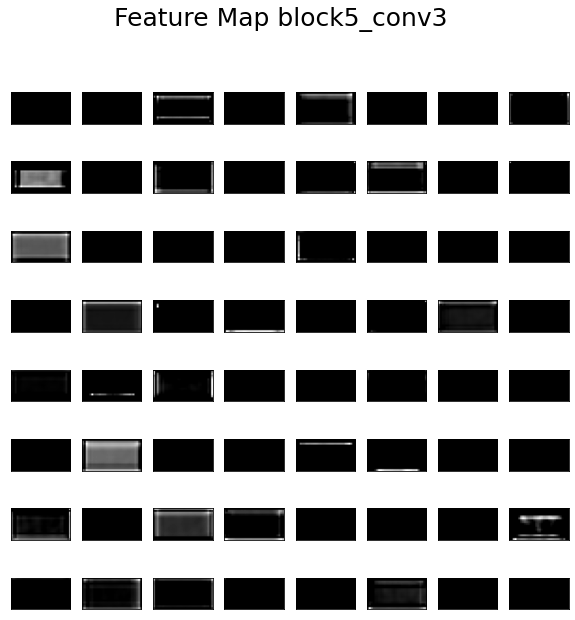

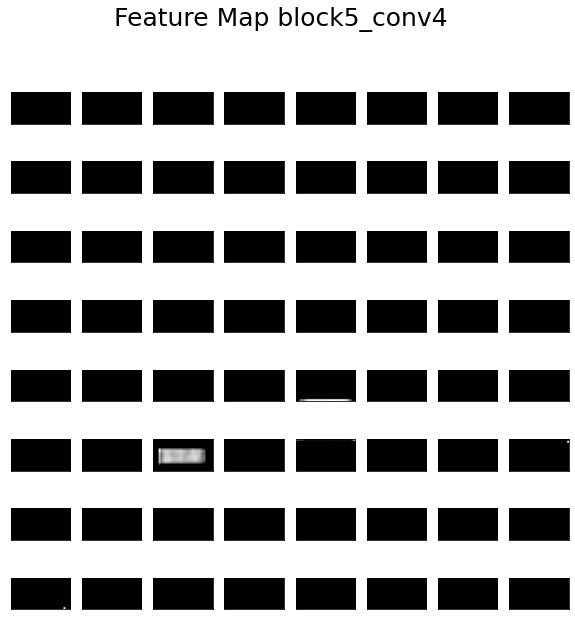

In [ ]:
# for each output layer
for i in range(0, len(layers)):
  ix: int = 1
  
  # create figure with white background and set title
  fig: Figure = plt.figure(figsize=(10,10))
  fig.set_facecolor("w")
  fig.suptitle(f"Feature Map {layers[i]}", fontsize=25)

  # add features in rows and cols
  for _ in range(8):
    for _ in range(8):
      ax: Axes = fig.add_subplot(8, 8, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(content_feature_maps[i][0, :, :, ix-1], cmap='gray')
      ix += 1

  # show plot
  plt.show()
  print('\n')
  print('\n')

As we can see, the best layers to extract content from are:
- block4_conv2
- block3_conv4
- block3_conv3
- block3_conv2

Since the original paper of Gatys et al. suggested block5_conv2, we will also give this layer an attempt.


## ***Experiments***

Now that we defined the model and explored the date, it's time to start our research experiments.

First, we want to find which intermediate layer is best to extract content from. We will test these intermediate layers:
- block5_conv2
- block4_conv2
- block3_conv4
- block3_conv3
- block3_conv2

Style intermediate layers will be the same as the Gayts paper suggested - block1_conv1, block2_conv1, block3_conv1 block4_conv1, block5_conv1

Next, we want to find what is the best content style ratio. We will set the style weight as a constant and change the content weight to change the ratio between them:

- Style weight:
  - 1e-2


- The content weights to test:
  - weight 0 = 1e1
  - weight 1 = 1e2
  - weight 2 = 1.25e2 
  - weight 3 = 1.5e2 
  - weight 4 = 1.75e2 
  - weight 5 = 1e3
  - weight 6 = 1.5e3 
  - weight 7 = 1e4
  - weight 8 = 1e5

In [ ]:
# define content layers
content_layers = ['block5_conv2', 'block4_conv2', 'block3_conv4', 'block3_conv3', 'block3_conv2'] 

# define style layer
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

# defion model constant parameters
style_weight=1e-2
total_variation_weight=30
epochs_without_variation = 10
epochs_with_variation = 10
steps_per_epoch = 100

### ***Experement 1***

Content is a modern Hebrew handwritten document.

Style is a Hebrew middle age document with text.

In [ ]:
content_image_path = '/content/partial_data_set/modern_hebrew/1.png'
style_image_path = '/content/partial_data_set/hebrew_middle_ages/2.png'

#### ***Weight 0***

In [ ]:
content_weight = 1e1
images = []

for layer in content_layers:
  img = tensor_to_image(render_image(content_image_path, style_image_path, 
                                     [layer], style_layers, style_weight, 
                                     content_weight, total_variation_weight, 
                                     epochs_without_variation, 
                                     epochs_with_variation, steps_per_epoch))
  images.append(img)

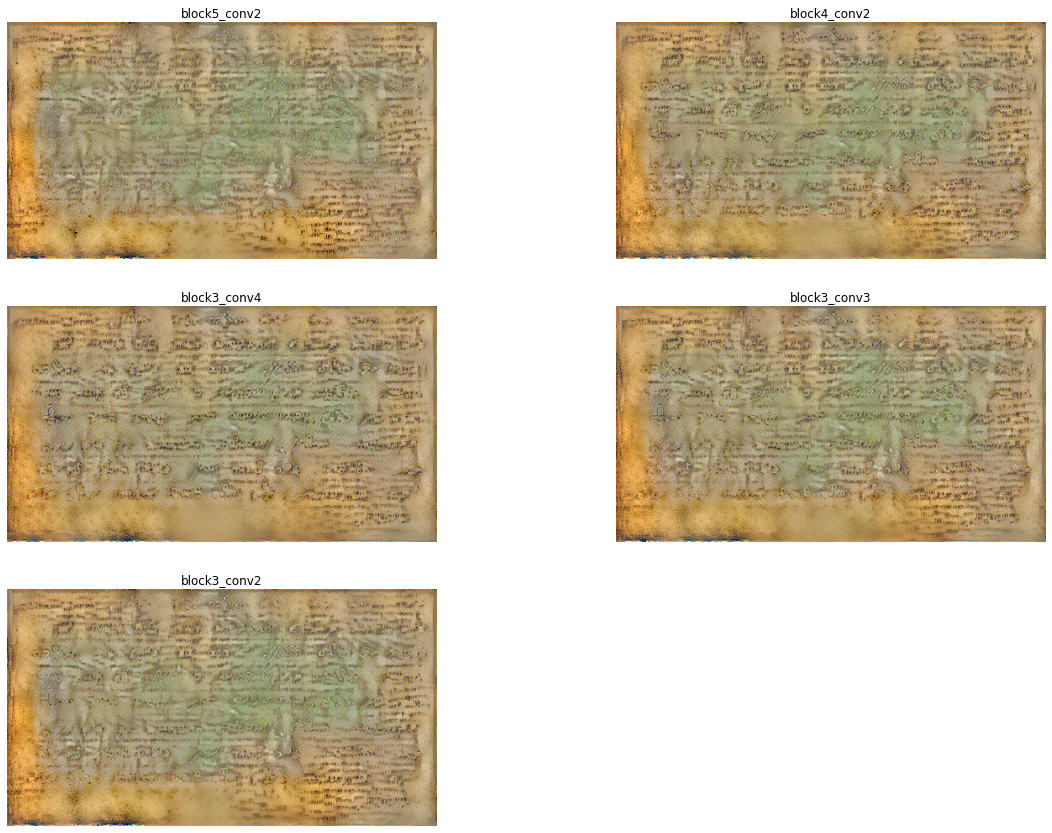

In [ ]:
show_images(images, 2, 4, content_layers, figsize=(20, 20))

#### ***Weight 1***

In [ ]:
content_weight = 1e2
images = []

for layer in content_layers:
  img = tensor_to_image(render_image(content_image_path, style_image_path, 
                                     [layer], style_layers, style_weight, 
                                     content_weight, total_variation_weight, 
                                     epochs_without_variation, 
                                     epochs_with_variation, steps_per_epoch))
  images.append(img)

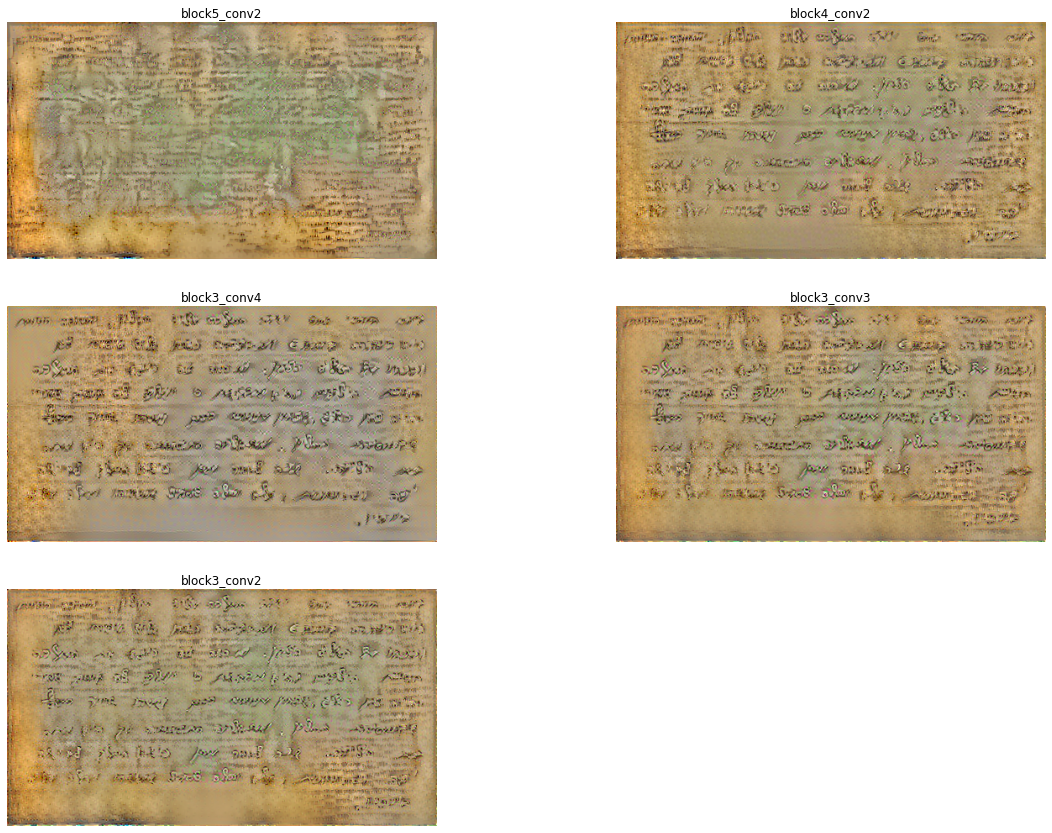

In [ ]:
show_images(images, 2, 4, content_layers, figsize=(20, 20))